In [23]:
print("="*80)
print("ENSEMBLE MODEL ÖZETİ")
print("="*80)
print("\nMODEL MİMARİSİ:")
print("  1. Random Forest Classifier (200 trees)")
print("     - Popularity'yi 3 sınıfa ayırır: Düşük (0-20), Orta (20-75), Yüksek (75-100)")
print("     - Çıktı: 3 sınıf olasılığı + tahmin edilen sınıf")
print("\n  2. MLP Regressor (128-64-32 neurons)")
print("     - Popularity için regresyon tahmini yapar")
print("     - Çıktı: Sürekli değer tahmini")
print("\n  3. Meta Model: Linear Regression")
print("     - RF ve MLP çıktılarını birleştirir")
print("     - 5 feature kullanır:")
print("       * RF sınıf olasılıkları (3)")
print("       * RF tahmin edilen sınıf (1)")
print("       * MLP regresyon tahmini (1)")

print("\n" + "="*80)
print("PERFORMANS SONUÇLARI (Test Set):")
print("="*80)
print(f"\nMLP Regressor:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

print(f"\nEnsemble Model (RF + MLP + LR):")
print(f"  RMSE: {ensemble_test_rmse:.4f}")
print(f"  MAE:  {ensemble_test_mae:.4f}")
print(f"  R²:   {ensemble_test_r2:.4f}")

print(f"\nİYİLEŞME:")
print(f"  RMSE: {improvement_rmse:+.2f}%")
print(f"  MAE:  {improvement_mae:+.2f}%")
print(f"  R²:   {improvement_r2:+.2f}%")

print("\n" + "="*80)
print("SONUÇ:")
if ensemble_test_r2 > test_r2:
    print("✓ Ensemble model, MLP'den daha iyi performans gösteriyor!")
else:
    print("✗ Ensemble model, MLP'den daha kötü performans gösteriyor.")
print("="*80)

ENSEMBLE MODEL ÖZETİ

MODEL MİMARİSİ:
  1. Random Forest Classifier (200 trees)
     - Popularity'yi 3 sınıfa ayırır: Düşük (0-20), Orta (20-75), Yüksek (75-100)
     - Çıktı: 3 sınıf olasılığı + tahmin edilen sınıf

  2. MLP Regressor (128-64-32 neurons)
     - Popularity için regresyon tahmini yapar
     - Çıktı: Sürekli değer tahmini

  3. Meta Model: Linear Regression
     - RF ve MLP çıktılarını birleştirir
     - 5 feature kullanır:
       * RF sınıf olasılıkları (3)
       * RF tahmin edilen sınıf (1)
       * MLP regresyon tahmini (1)

PERFORMANS SONUÇLARI (Test Set):

MLP Regressor:
  RMSE: 20.1912
  MAE:  16.5436
  R²:   0.2762

Ensemble Model (RF + MLP + LR):
  RMSE: 20.9650
  MAE:  17.3172
  R²:   0.2197

İYİLEŞME:
  RMSE: -3.83%
  MAE:  -4.68%
  R²:   -20.47%

SONUÇ:
✗ Ensemble model, MLP'den daha kötü performans gösteriyor.


## 10. Özet ve Sonuçlar

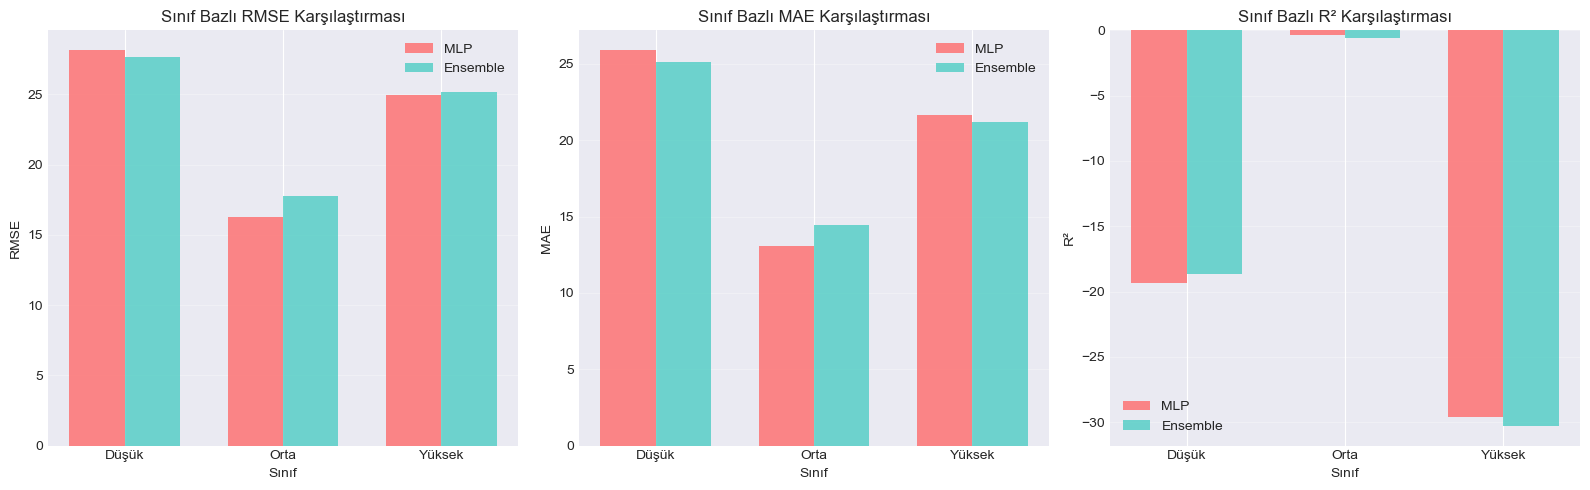

In [22]:
# Sınıf bazlı performans görselleştirmesi
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x_pos = np.arange(len(class_perf_df))
width = 0.35

# RMSE
axes[0].bar(x_pos - width/2, class_perf_df['MLP RMSE'], width, 
            label='MLP', color='#FF6B6B', alpha=0.8)
axes[0].bar(x_pos + width/2, class_perf_df['Ensemble RMSE'], width, 
            label='Ensemble', color='#4ECDC4', alpha=0.8)
axes[0].set_xlabel('Sınıf')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Sınıf Bazlı RMSE Karşılaştırması')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(['Düşük', 'Orta', 'Yüksek'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# MAE
axes[1].bar(x_pos - width/2, class_perf_df['MLP MAE'], width, 
            label='MLP', color='#FF6B6B', alpha=0.8)
axes[1].bar(x_pos + width/2, class_perf_df['Ensemble MAE'], width, 
            label='Ensemble', color='#4ECDC4', alpha=0.8)
axes[1].set_xlabel('Sınıf')
axes[1].set_ylabel('MAE')
axes[1].set_title('Sınıf Bazlı MAE Karşılaştırması')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['Düşük', 'Orta', 'Yüksek'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# R²
axes[2].bar(x_pos - width/2, class_perf_df['MLP R²'], width, 
            label='MLP', color='#FF6B6B', alpha=0.8)
axes[2].bar(x_pos + width/2, class_perf_df['Ensemble R²'], width, 
            label='Ensemble', color='#4ECDC4', alpha=0.8)
axes[2].set_xlabel('Sınıf')
axes[2].set_ylabel('R²')
axes[2].set_title('Sınıf Bazlı R² Karşılaştırması')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(['Düşük', 'Orta', 'Yüksek'])
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Her sınıf için performansı analiz et
class_performance = []

for class_idx in range(3):
    class_mask = y_class_test == class_idx
    
    if class_mask.sum() > 0:
        mlp_rmse = np.sqrt(mean_squared_error(y_reg_test[class_mask], 
                                               y_reg_pred_test[class_mask]))
        ensemble_rmse = np.sqrt(mean_squared_error(y_reg_test[class_mask], 
                                                    y_ensemble_pred_test[class_mask]))
        
        mlp_mae = mean_absolute_error(y_reg_test[class_mask], 
                                      y_reg_pred_test[class_mask])
        ensemble_mae = mean_absolute_error(y_reg_test[class_mask], 
                                           y_ensemble_pred_test[class_mask])
        
        mlp_r2 = r2_score(y_reg_test[class_mask], y_reg_pred_test[class_mask])
        ensemble_r2 = r2_score(y_reg_test[class_mask], y_ensemble_pred_test[class_mask])
        
        class_performance.append({
            'Sınıf': ['Düşük (0-20)', 'Orta (20-75)', 'Yüksek (75-100)'][class_idx],
            'Örnek Sayısı': class_mask.sum(),
            'MLP RMSE': mlp_rmse,
            'Ensemble RMSE': ensemble_rmse,
            'MLP MAE': mlp_mae,
            'Ensemble MAE': ensemble_mae,
            'MLP R²': mlp_r2,
            'Ensemble R²': ensemble_r2
        })

class_perf_df = pd.DataFrame(class_performance)
print("SINIF BAZLI PERFORMANS ANALİZİ:")
print("="*100)
print(class_perf_df.to_string(index=False))
print("="*100)

SINIF BAZLI PERFORMANS ANALİZİ:
          Sınıf  Örnek Sayısı  MLP RMSE  Ensemble RMSE   MLP MAE  Ensemble MAE     MLP R²  Ensemble R²
   Düşük (0-20)          1361 28.148735      27.684561 25.902248     25.132499 -19.357347   -18.691495
   Orta (20-75)          4042 16.246084      17.789310 13.051294     14.426931  -0.337612    -0.603803
Yüksek (75-100)           269 24.928606      25.195587 21.668288     21.206132 -29.622552   -30.281990


## 9. Sınıf Bazlı Performans Analizi

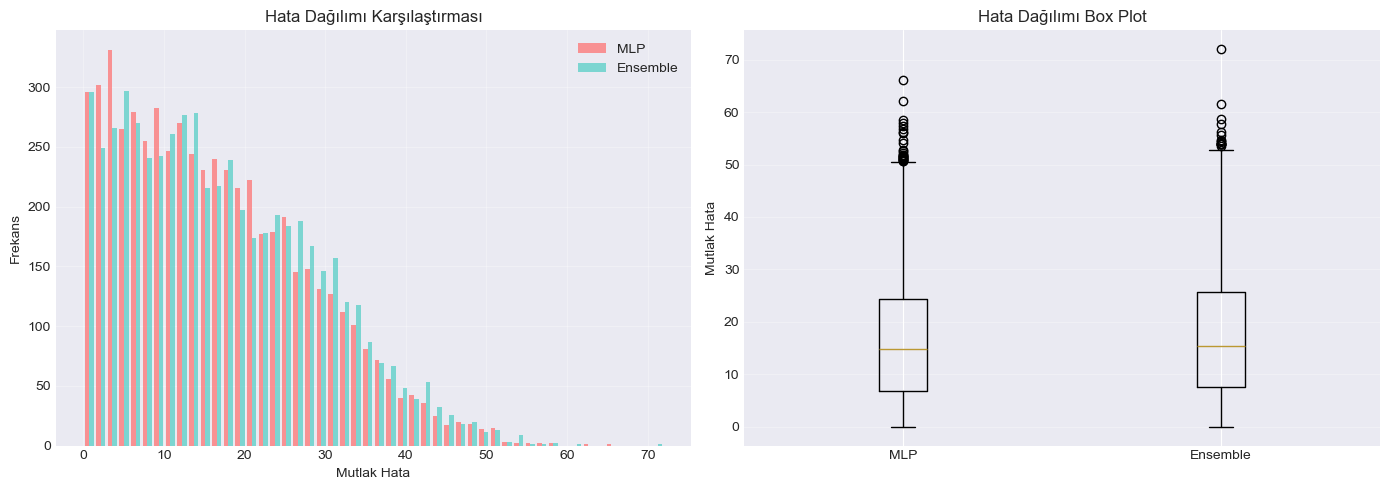

Hata İstatistikleri:

MLP Regressor:
  Ortalama Hata: 16.5436
  Medyan Hata: 14.7623
  Std Hata: 11.5766

Ensemble Model:
  Ortalama Hata: 17.3172
  Medyan Hata: 15.4469
  Std Hata: 11.8181


In [20]:
# Hata dağılımı
mlp_errors = np.abs(y_reg_test - y_reg_pred_test)
ensemble_errors = np.abs(y_reg_test - y_ensemble_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist([mlp_errors, ensemble_errors], bins=50, label=['MLP', 'Ensemble'], 
         alpha=0.7, color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Mutlak Hata')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı Karşılaştırması')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([mlp_errors, ensemble_errors], labels=['MLP', 'Ensemble'])
plt.ylabel('Mutlak Hata')
plt.title('Hata Dağılımı Box Plot')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Hata İstatistikleri:")
print(f"\nMLP Regressor:")
print(f"  Ortalama Hata: {mlp_errors.mean():.4f}")
print(f"  Medyan Hata: {np.median(mlp_errors):.4f}")
print(f"  Std Hata: {mlp_errors.std():.4f}")

print(f"\nEnsemble Model:")
print(f"  Ortalama Hata: {ensemble_errors.mean():.4f}")
print(f"  Medyan Hata: {np.median(ensemble_errors):.4f}")
print(f"  Std Hata: {ensemble_errors.std():.4f}")

## 8. Hata Analizi

In [ ]:
# Tahmin görselleştirmeleri
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MLP Predictions
axes[0].scatter(y_reg_test, y_reg_pred_test, alpha=0.5, s=15, label='Predictions')
axes[0].plot([y_reg_test.min(), y_reg_test.max()], 
             [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Perfect Fit')
axes[0].set_xlabel('Gerçek Popularity')
axes[0].set_ylabel('Tahmin Edilen Popularity')
axes[0].set_title(f'MLP Regressor\n(R²={test_r2:.4f}, RMSE={test_rmse:.4f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Ensemble Predictions
axes[1].scatter(y_reg_test, y_ensemble_pred_test, alpha=0.5, s=15, 
                label='Predictions', color='green')
axes[1].plot([y_reg_test.min(), y_reg_test.max()], 
             [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Perfect Fit')
axes[1].set_xlabel('Gerçek Popularity')
axes[1].set_ylabel('Tahmin Edilen Popularity')
axes[1].set_title(f'Ensemble Model\n(R²={ensemble_test_r2:.4f}, RMSE={ensemble_test_rmse:.4f})')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Residuals Comparison
axes[2].scatter(y_reg_test, y_reg_test - y_reg_pred_test, alpha=0.5, s=15, 
                label='MLP', color='#FF6B6B')
axes[2].scatter(y_reg_test, y_reg_test - y_ensemble_pred_test, alpha=0.5, s=15, 
                label='Ensemble', color='#4ECDC4')
axes[2].axhline(y=0, color='black', linestyle='--', lw=2)
axes[2].set_xlabel('Gerçek Popularity')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Karşılaştırması')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

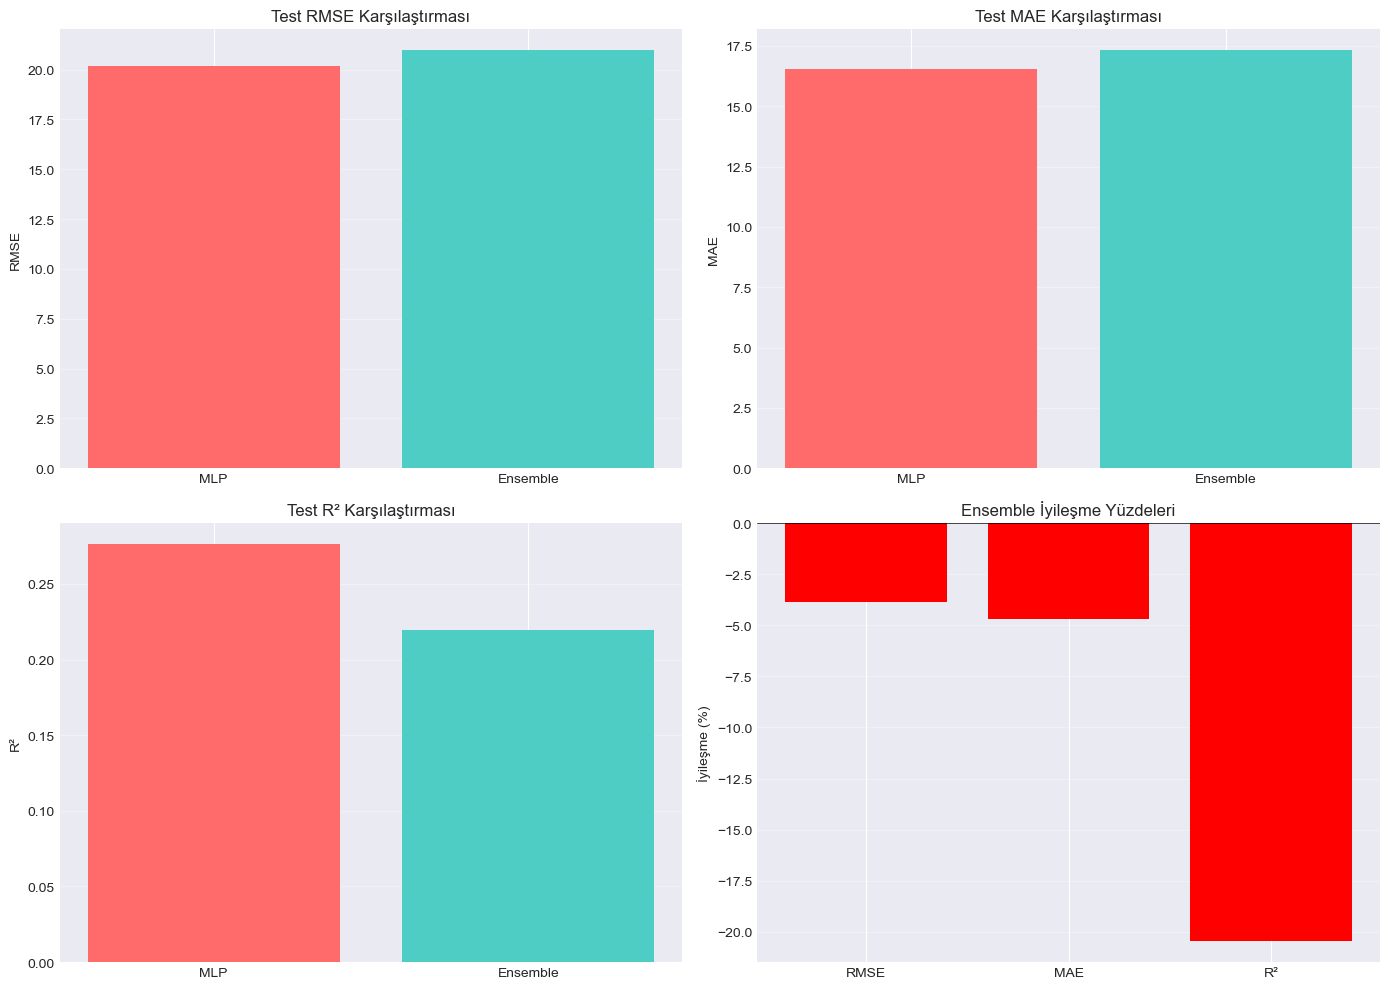

In [19]:
# Görselleştirme - Model Karşılaştırması
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Test RMSE
axes[0, 0].bar(['MLP', 'Ensemble'], [test_rmse, ensemble_test_rmse], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Test RMSE Karşılaştırması')
axes[0, 0].grid(axis='y', alpha=0.3)

# Test MAE
axes[0, 1].bar(['MLP', 'Ensemble'], [test_mae, ensemble_test_mae], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Test MAE Karşılaştırması')
axes[0, 1].grid(axis='y', alpha=0.3)

# Test R²
axes[1, 0].bar(['MLP', 'Ensemble'], [test_r2, ensemble_test_r2], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_ylabel('R²')
axes[1, 0].set_title('Test R² Karşılaştırması')
axes[1, 0].grid(axis='y', alpha=0.3)

# İyileşme yüzdeleri
improvements = [improvement_rmse, improvement_mae, improvement_r2]
metrics = ['RMSE', 'MAE', 'R²']
colors_imp = ['green' if x > 0 else 'red' for x in improvements]
axes[1, 1].bar(metrics, improvements, color=colors_imp)
axes[1, 1].set_ylabel('İyileşme (%)')
axes[1, 1].set_title('Ensemble İyileşme Yüzdeleri')
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Tüm modelleri karşılaştır
comparison_df = pd.DataFrame({
    'Model': ['MLP Regressor', 'Ensemble (RF + MLP + LR)'],
    'Train RMSE': [train_rmse, ensemble_train_rmse],
    'Test RMSE': [test_rmse, ensemble_test_rmse],
    'Train MAE': [train_mae, ensemble_train_mae],
    'Test MAE': [test_mae, ensemble_test_mae],
    'Train R²': [train_r2, ensemble_train_r2],
    'Test R²': [test_r2, ensemble_test_r2]
})

print("\nMODEL KARŞILAŞTIRMASI:")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# İyileşme yüzdesi
improvement_rmse = ((test_rmse - ensemble_test_rmse) / test_rmse) * 100
improvement_mae = ((test_mae - ensemble_test_mae) / test_mae) * 100
improvement_r2 = ((ensemble_test_r2 - test_r2) / test_r2) * 100

print(f"\nENSEMBLE İYİLEŞMESİ (Test Set):")
print(f"  RMSE İyileşmesi: {improvement_rmse:.2f}%")
print(f"  MAE İyileşmesi: {improvement_mae:.2f}%")
print(f"  R² İyileşmesi: {improvement_r2:.2f}%")


MODEL KARŞILAŞTIRMASI:
                   Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²
           MLP Regressor   19.830965  20.191181  16.281512 16.543558  0.299496 0.276202
Ensemble (RF + MLP + LR)   17.610409  20.964967  14.524605 17.317249  0.447590 0.219663

ENSEMBLE İYİLEŞMESİ (Test Set):
  RMSE İyileşmesi: -3.83%
  MAE İyileşmesi: -4.68%
  R² İyileşmesi: -20.47%


## 7. Model Karşılaştırması

In [17]:
# Meta model tahminleri
y_ensemble_pred_train = meta_model.predict(meta_train)
y_ensemble_pred_test = meta_model.predict(meta_test)

# Performans metrikleri
ensemble_train_mse = mean_squared_error(y_reg_train, y_ensemble_pred_train)
ensemble_test_mse = mean_squared_error(y_reg_test, y_ensemble_pred_test)
ensemble_train_rmse = np.sqrt(ensemble_train_mse)
ensemble_test_rmse = np.sqrt(ensemble_test_mse)
ensemble_train_mae = mean_absolute_error(y_reg_train, y_ensemble_pred_train)
ensemble_test_mae = mean_absolute_error(y_reg_test, y_ensemble_pred_test)
ensemble_train_r2 = r2_score(y_reg_train, y_ensemble_pred_train)
ensemble_test_r2 = r2_score(y_reg_test, y_ensemble_pred_test)

print("ENSEMBLE MODEL PERFORMANSI:")
print(f"\nTrain Set:")
print(f"  MSE: {ensemble_train_mse:.4f}")
print(f"  RMSE: {ensemble_train_rmse:.4f}")
print(f"  MAE: {ensemble_train_mae:.4f}")
print(f"  R²: {ensemble_train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE: {ensemble_test_mse:.4f}")
print(f"  RMSE: {ensemble_test_rmse:.4f}")
print(f"  MAE: {ensemble_test_mae:.4f}")
print(f"  R²: {ensemble_test_r2:.4f}")

ENSEMBLE MODEL PERFORMANSI:

Train Set:
  MSE: 310.1265
  RMSE: 17.6104
  MAE: 14.5246
  R²: 0.4476

Test Set:
  MSE: 439.5299
  RMSE: 20.9650
  MAE: 17.3172
  R²: 0.2197


In [16]:
# Meta model: Linear Regression
meta_model = LinearRegression()

print("Meta model eğitiliyor...")
meta_model.fit(meta_train, y_reg_train)
print("Eğitim tamamlandı!")

# Katsayıları göster
coefficients = pd.DataFrame({
    'Feature': ['RF_Prob_Class_0', 'RF_Prob_Class_1', 'RF_Prob_Class_2', 
                'RF_Pred_Class', 'MLP_Prediction'],
    'Coefficient': meta_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nMeta Model Katsayıları:")
print(coefficients)
print(f"\nIntercept: {meta_model.intercept_:.4f}")

Meta model eğitiliyor...
Eğitim tamamlandı!

Meta Model Katsayıları:
           Feature  Coefficient
2  RF_Prob_Class_2    62.238058
1  RF_Prob_Class_1    18.014025
4   MLP_Prediction     0.001436
3    RF_Pred_Class    -3.853665
0  RF_Prob_Class_0   -80.252083

Intercept: 46.3594


In [15]:
# Meta model için feature'ları birleştir
# RF'den: 3 sınıf olasılığı + tahmin edilen sınıf
# MLP'den: regresyon tahmini

# Train set için meta features
meta_train = np.column_stack([
    y_class_proba_train,  # 3 olasılık değeri
    y_class_pred_train.reshape(-1, 1),  # Tahmin edilen sınıf
    y_reg_pred_train.reshape(-1, 1)  # MLP regresyon tahmini
])

# Test set için meta features
meta_test = np.column_stack([
    y_class_proba_test,
    y_class_pred_test.reshape(-1, 1),
    y_reg_pred_test.reshape(-1, 1)
])

print(f"Meta model train features shape: {meta_train.shape}")
print(f"Meta model test features shape: {meta_test.shape}")
print(f"\nMeta features:")
print("  - RF Class 0 Probability")
print("  - RF Class 1 Probability")
print("  - RF Class 2 Probability")
print("  - RF Predicted Class")
print("  - MLP Regression Prediction")

Meta model train features shape: (22684, 5)
Meta model test features shape: (5672, 5)

Meta features:
  - RF Class 0 Probability
  - RF Class 1 Probability
  - RF Class 2 Probability
  - RF Predicted Class
  - MLP Regression Prediction


## 6. Meta Model: Linear Regression (Ensemble)

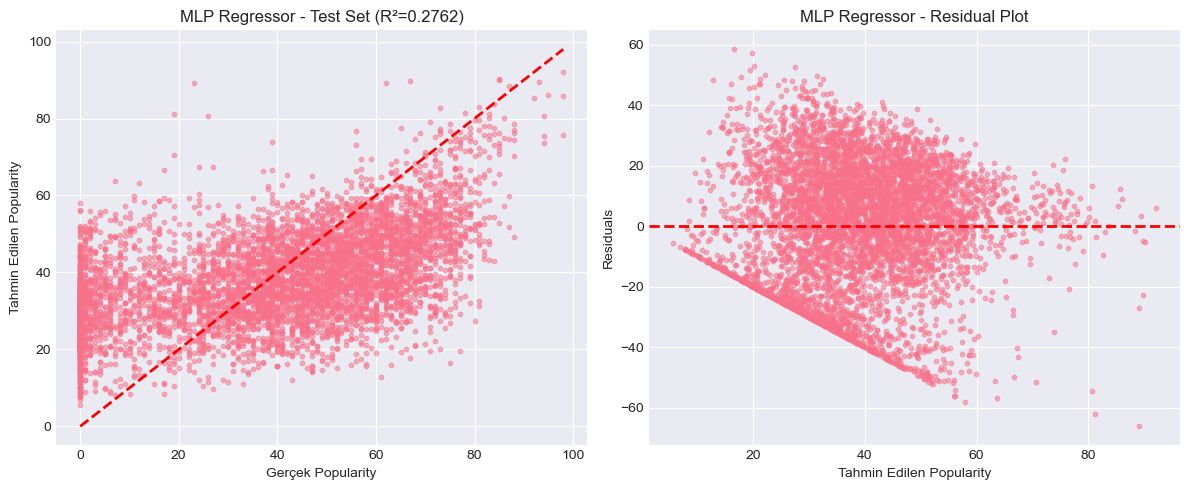

In [14]:
# MLP tahmin görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_reg_test, y_reg_pred_test, alpha=0.5, s=10)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Popularity')
plt.ylabel('Tahmin Edilen Popularity')
plt.title(f'MLP Regressor - Test Set (R²={test_r2:.4f})')

plt.subplot(1, 2, 2)
residuals = y_reg_test - y_reg_pred_test
plt.scatter(y_reg_pred_test, residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Tahmin Edilen Popularity')
plt.ylabel('Residuals')
plt.title('MLP Regressor - Residual Plot')

plt.tight_layout()
plt.show()

In [13]:
# MLP tahminleri
y_reg_pred_train = mlp_regressor.predict(X_train_scaled)
y_reg_pred_test = mlp_regressor.predict(X_test_scaled)

# Performans metrikleri
train_mse = mean_squared_error(y_reg_train, y_reg_pred_train)
test_mse = mean_squared_error(y_reg_test, y_reg_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_reg_train, y_reg_pred_train)
test_mae = mean_absolute_error(y_reg_test, y_reg_pred_test)
train_r2 = r2_score(y_reg_train, y_reg_pred_train)
test_r2 = r2_score(y_reg_test, y_reg_pred_test)

print("MLP Regressor Performansı:")
print(f"\nTrain Set:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R²: {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")

MLP Regressor Performansı:

Train Set:
  MSE: 393.2672
  RMSE: 19.8310
  MAE: 16.2815
  R²: 0.2995

Test Set:
  MSE: 407.6838
  RMSE: 20.1912
  MAE: 16.5436
  R²: 0.2762


In [12]:
# MLP Regressor'ı eğit
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=64,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)

print("MLP Regressor eğitiliyor...")
mlp_regressor.fit(X_train_scaled, y_reg_train)
print("Eğitim tamamlandı!")

MLP Regressor eğitiliyor...
Iteration 1, loss = 310.79017270
Validation score: 0.233840
Iteration 2, loss = 214.61393176
Validation score: 0.247634
Iteration 3, loss = 210.51623940
Validation score: 0.252824
Iteration 4, loss = 207.52549697
Validation score: 0.264522
Iteration 5, loss = 205.84134010
Validation score: 0.262968
Iteration 6, loss = 204.48552633
Validation score: 0.270615
Iteration 7, loss = 202.81361033
Validation score: 0.268097
Iteration 8, loss = 201.84493248
Validation score: 0.268886
Iteration 9, loss = 200.45498355
Validation score: 0.263636
Iteration 10, loss = 199.53434058
Validation score: 0.271329
Iteration 11, loss = 198.32325054
Validation score: 0.272497
Iteration 12, loss = 196.80880783
Validation score: 0.270539
Iteration 13, loss = 196.12992734
Validation score: 0.271339
Iteration 14, loss = 194.96501181
Validation score: 0.265065
Iteration 15, loss = 193.32421230
Validation score: 0.264713
Iteration 16, loss = 192.44941952
Validation score: 0.264408
Itera

## 5. Model 2: MLP Regressor

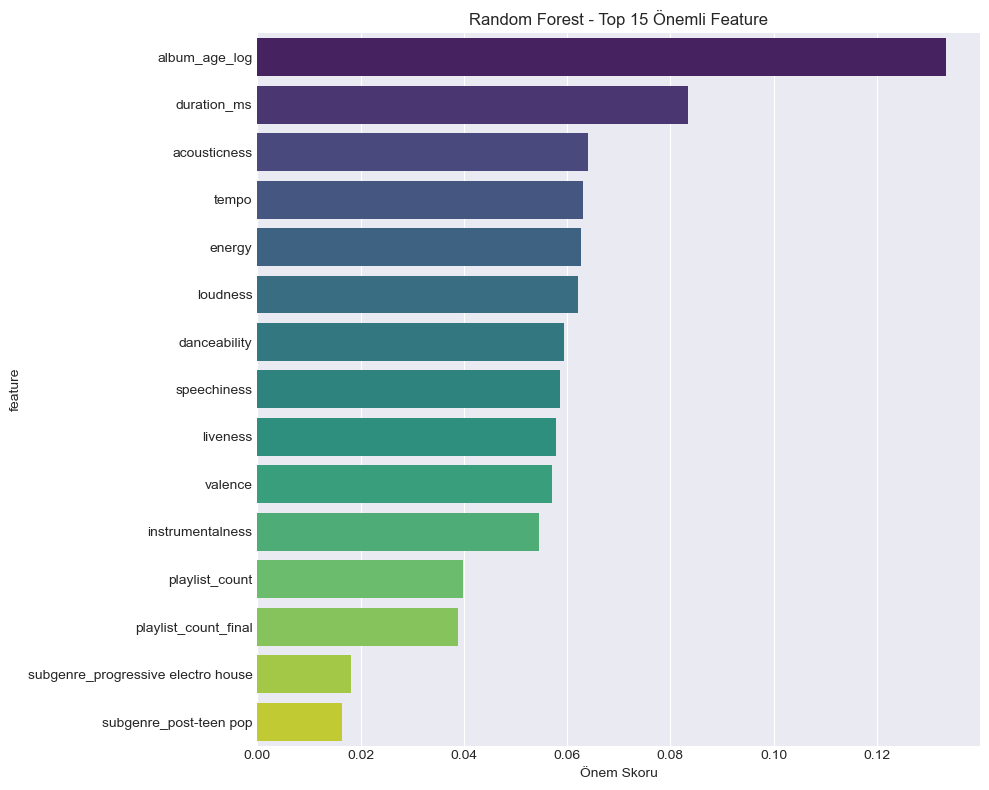


Top 10 Önemli Feature:
          feature  importance
36  album_age_log    0.133319
10    duration_ms    0.083422
5    acousticness    0.064127
9           tempo    0.062994
1          energy    0.062665
2        loudness    0.062199
0    danceability    0.059405
4     speechiness    0.058542
7        liveness    0.057866
8         valence    0.057140


In [11]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Top 15 Önemli Feature')
plt.xlabel('Önem Skoru')
plt.tight_layout()
plt.show()

print("\nTop 10 Önemli Feature:")
print(feature_importance.head(10))

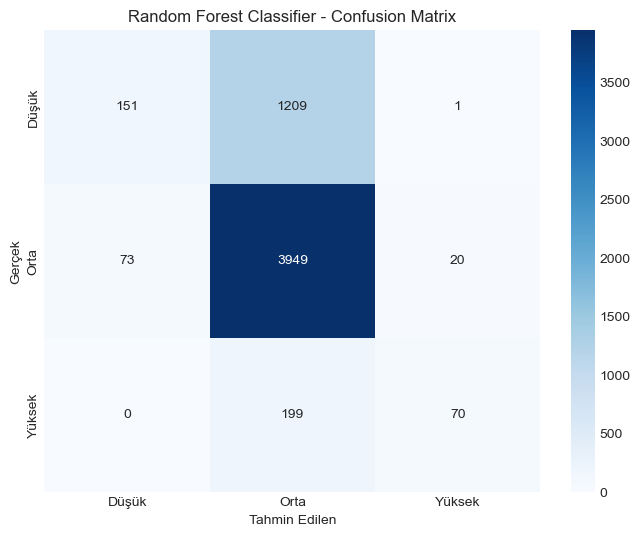

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_class_test, y_class_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Düşük', 'Orta', 'Yüksek'],
            yticklabels=['Düşük', 'Orta', 'Yüksek'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

In [9]:
# Random Forest tahminleri
y_class_pred_train = rf_classifier.predict(X_train)
y_class_pred_test = rf_classifier.predict(X_test)

# Olasılıklar (meta model için kullanılacak)
y_class_proba_train = rf_classifier.predict_proba(X_train)
y_class_proba_test = rf_classifier.predict_proba(X_test)

print("Classification Performansı (Test Set):")
print(classification_report(y_class_test, y_class_pred_test, 
                          target_names=['Düşük (0-20)', 'Orta (20-75)', 'Yüksek (75-100)']))

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Classification Performansı (Test Set):
                 precision    recall  f1-score   support

   Düşük (0-20)       0.67      0.11      0.19      1361
   Orta (20-75)       0.74      0.98      0.84      4042
Yüksek (75-100)       0.77      0.26      0.39       269

       accuracy                           0.74      5672
      macro avg       0.73      0.45      0.47      5672
   weighted avg       0.72      0.74      0.66      5672



[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.0s finished


In [8]:
# Random Forest Classifier'ı eğit
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Random Forest Classifier eğitiliyor...")
rf_classifier.fit(X_train, y_class_train)
print("Eğitim tamamlandı!")

Random Forest Classifier eğitiliyor...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s


Eğitim tamamlandı!


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.8s finished


## 4. Model 1: Random Forest Classifier (3 Sınıf)

In [7]:
# Veriyi train ve test setlerine böl
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"Train set boyutu: {X_train.shape}")
print(f"Test set boyutu: {X_test.shape}")

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train set boyutu: (22684, 38)
Test set boyutu: (5672, 38)


In [6]:
# Features ve target'ı ayır
# artist ve popularity kolonlarını çıkar
X = df.drop(['artist', 'popularity', 'popularity_class'], axis=1)
y_reg = df['popularity']  # Regresyon için
y_class = df['popularity_class']  # Classification için

print(f"Feature sayısı: {X.shape[1]}")
print(f"Feature isimleri: {list(X.columns)}")

Feature sayısı: 38
Feature isimleri: ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'playlist_count', 'subgenre_album rock', 'subgenre_big room', 'subgenre_classic rock', 'subgenre_dance pop', 'subgenre_electro house', 'subgenre_electropop', 'subgenre_gangster rap', 'subgenre_hard rock', 'subgenre_hip hop', 'subgenre_hip pop', 'subgenre_indie poptimism', 'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul', 'subgenre_new jack swing', 'subgenre_permanent wave', 'subgenre_pop edm', 'subgenre_post-teen pop', 'subgenre_progressive electro house', 'subgenre_reggaeton', 'subgenre_southern hip hop', 'subgenre_trap', 'subgenre_tropical', 'subgenre_urban contemporary', 'album_age_log', 'playlist_count_final']


## 3. Veriyi Hazırla ve Böl

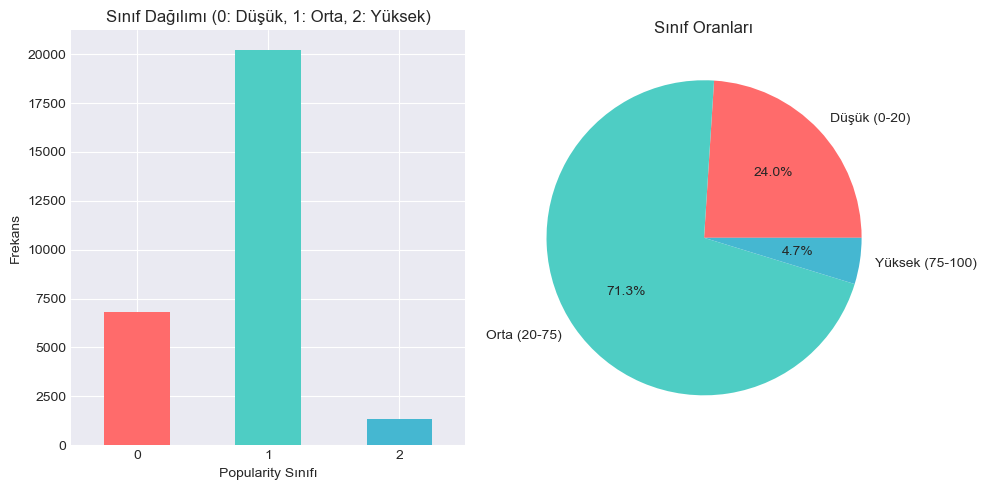

In [5]:
# Görselleştir
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
class_dist.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Popularity Sınıfı')
plt.ylabel('Frekans')
plt.title('Sınıf Dağılımı (0: Düşük, 1: Orta, 2: Yüksek)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(class_dist.values, labels=['Düşük (0-20)', 'Orta (20-75)', 'Yüksek (75-100)'], 
        autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Sınıf Oranları')

plt.tight_layout()
plt.show()

In [4]:
# Popularity'yi 3 sınıfa ayır
def categorize_popularity(pop):
    if pop < 20:
        return 0  # Düşük
    elif pop < 75:
        return 1  # Orta
    else:
        return 2  # Yüksek

df['popularity_class'] = df['popularity'].apply(categorize_popularity)

# Sınıf dağılımını göster
class_dist = df['popularity_class'].value_counts().sort_index()
print("Sınıf Dağılımı:")
print(class_dist)
print(f"\nSınıf Oranları:")
print(df['popularity_class'].value_counts(normalize=True).sort_index())

Sınıf Dağılımı:
popularity_class
0     6802
1    20209
2     1345
Name: count, dtype: int64

Sınıf Oranları:
popularity_class
0    0.239879
1    0.712689
2    0.047433
Name: proportion, dtype: float64


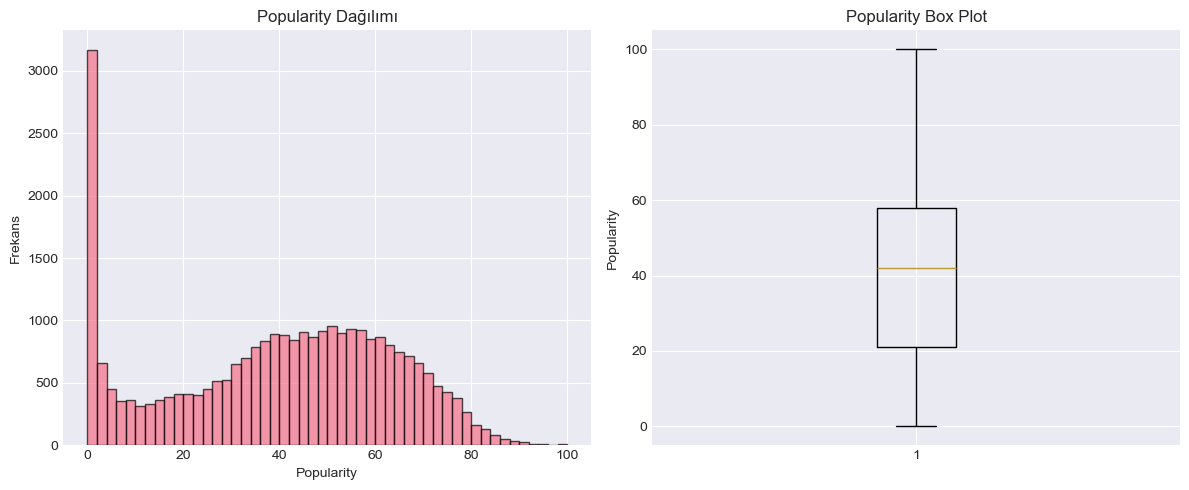

Popularity İstatistikleri:
count    28356.000000
mean        39.329771
std         23.702376
min          0.000000
25%         21.000000
50%         42.000000
75%         58.000000
max        100.000000
Name: popularity, dtype: float64


In [3]:
# Popularity dağılımı
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frekans')
plt.title('Popularity Dağılımı')

plt.subplot(1, 2, 2)
plt.boxplot(df['popularity'])
plt.ylabel('Popularity')
plt.title('Popularity Box Plot')

plt.tight_layout()
plt.show()

print(f"Popularity İstatistikleri:")
print(df['popularity'].describe())

In [2]:
# Veriyi yükle
df = pd.read_csv('../final_data.csv')

print(f"Veri boyutu: {df.shape}")
print(f"\nİlk 5 satır:")
df.head()

Veri boyutu: (28356, 40)

İlk 5 satır:


,artist,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,subgenre_pop edm,subgenre_post-teen pop,subgenre_progressive electro house,subgenre_reggaeton,subgenre_southern hip hop,subgenre_trap,subgenre_tropical,subgenre_urban contemporary,album_age_log,playlist_count_final
0,Ed Sheeran,66,0.748,0.916,0.918090,1,0.0583,0.1020,0.000000,0.0653,...,1,0,0,0,0,0,0,0,0.063116,0.5
1,Maroon 5,67,0.726,0.815,0.869162,1,0.0373,0.0724,0.004210,0.3570,...,1,0,0,0,0,0,0,0,0.063116,0.5
2,Zara Larsson,70,0.675,0.931,0.901368,0,0.0742,0.0794,0.000023,0.1100,...,1,0,0,0,0,0,0,0,0.063116,1.0
3,The Chainsmokers,60,0.718,0.930,0.894118,1,0.1020,0.0287,0.000009,0.2040,...,0,0,0,0,0,0,0,0,0.063116,0.0
4,Lewis Capaldi,69,0.650,0.833,0.875385,1,0.0359,0.0803,0.000000,0.0833,...,0,0,0,0,0,0,0,0,0.063116,0.0


## 2. Veriyi Yükle ve Hazırla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    mean_squared_error, 
    r2_score, 
    mean_absolute_error
)
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Kütüphaneleri İçe Aktar

# Ensemble Model: Random Forest Classifier + MLP Regressor + Meta Model

Bu notebook'ta hybrid bir ensemble model oluşturacağız:
1. **Random Forest Classifier**: Popularity'yi 3 sınıfa ayırarak classification yapar (0-20, 20-75, 75-100)
2. **MLP Regressor**: Popularity için regresyon tahmini yapar
3. **Meta Model (Linear Regression)**: İki modelin çıktılarını birleştirerek final tahmin yapar